지금까지 살펴본 네트워크들은 입력에 대한 출력을 학습한 뒤에 학습 과정에서 못봤던 새로운 입력에 대해서도 알맞은 정답을 출력하는 것이 목표였다. 이처럼 입력에 대한 출력의 쌍이 존재하고 그 관계를 학습하는 방법을 지도학습이라고 한다. 

오토 인코더는 입력에 대한 출력을 학습해야 한다는 점에서 다른 지도학습 네트워크와 동일하지만 그 출력이 입력과 동일하다는 점이 특이하다.
즉, 오토인코더는 자기 자신을 재생하는 네트워크이다.


# 9. 1 Encoder와 Decoder 그리고 Latent Vector
오토 인코더는 크게 세 부분으로 나눌 수 있다.
가운데 Dense 레이어로 표시되는 잠재 변수를 중심으로 입력에 가까운 부분을 인코더, 출력에 가까운 부분을 디코더로 분류할 수 있다.

- 인코더 : 입력에서 잠재변수를 만드는 부분 -> 특징 추출기 역할
 ( 특징 추출기 : 입력 이미지에서 특징을 추출해서 일차원 벡터로 만든다)
- 잠재 변수 : 추출한 특징을 추출해서 일차원 벡터로 만든다. 압축된 잠재 변수는 데이터의 특징을 가장 잘 표현하는 정보이기 때문에 여러 가지 용도로 쓰인다.
- 디코더 : 잠재 변수를 출력으로 만드는 부분

인코더와 디코더, 둘은 일반적으로 동일한 레이어를 대칭되는 구조로 쌓아올려서 만든다.



In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 3.8MB 45.8MB/s 
     |████████████████████████████████| 450kB 55.0MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


# 9.2 MNIST 데이터셋에 적용하기

In [2]:
# 데이터셋 불러오기
import tensorflow as tf
import keras
from keras.optimizers import Adam, SGD
import numpy as np

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# 픽셀 정규화
train_x = train_x / 255.0
test_x = test_x / 255.0

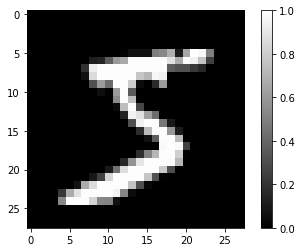

5


In [4]:
# mnist 데이터셋 확인
import matplotlib.pyplot as plt
plt.imshow(train_x[0].reshape(28,28), cmap='gray')
plt.colorbar()
plt.show()

print(train_y[0])

In [5]:
train_x = train_x.reshape(-1, 28*28)
test_x = test_x.reshape(-1, 28*28)
print(train_x.shape, test_x.shape)

(60000, 784) (10000, 784)


In [6]:
# Dense 오토인코더 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(784,activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Dense 오토인코더 모델 학습
model.fit(train_x, train_x, epochs=10, batch_size=256)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0527
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0183
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0127
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0106
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0094
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0087
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0082
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0077
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0074
Epoch 10/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0071


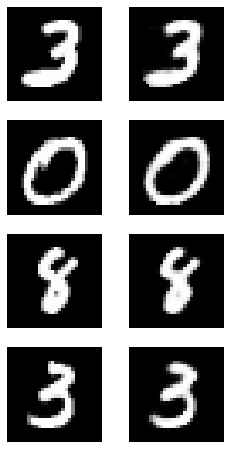

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.006929706563055515

In [8]:
# 테스트 데이터로 Dense 오토인코더의 이미지 재생성
import random
plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_x.shape[0])
    plt.imshow(test_x[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_x[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_x, test_x)

In [9]:
# 컨볼루션 오토인코더의 모델 정의
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
        # 인코더
        tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
        tf.keras.layers.Flatten(),   # 3차원 -> 1차원

        tf.keras.layers.Dense(64, activation='relu'), # 잠재변수를 만들자
        # 디코더
        tf.keras.layers.Dense(7*7*64, activation='relu'),
        tf.keras.layers.Reshape(target_shape=(7,7,64)),  # 1차원 -> 3차원
        # Deconvolution
        tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
        tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid') # 흑백으로 출력
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_4 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)       

In [10]:
# 컨볼루션 오토인코더 모델 학습
model.fit(train_x, train_x, epochs=20, batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 349us/sample - loss: 0.0777
Epoch 2/20
60000/60000 [==============================] - 20s 341us/sample - loss: 0.0332
Epoch 3/20
60000/60000 [==============================] - 20s 338us/sample - loss: 0.0223
Epoch 4/20
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0193
Epoch 5/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0180
Epoch 6/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0173
Epoch 7/20
60000/60000 [==============================] - 20s 336us/sample - loss: 0.0168
Epoch 8/20
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0164
Epoch 9/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.0161
Epoch 10/20
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0159
Epoch 11/20
60000/60000 [==============================] - 20s 330us/sample 

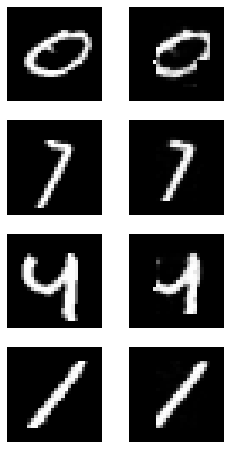

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.014603116182982922

In [11]:
# 테스트 데이터로 컨볼루션 오토인코더의 이미지 재 생성
import random
plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_x.shape[0])
    plt.imshow(test_x[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_x[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_x, test_x)

오른쪽의 출력 결과는 왼쪽의 원본에 비해 중간중간 각진 모습이 보인다. 이것은 네트워크의 일부분에서 값이 아예 사라지는 것을 의미한다. 활성화함수로 사용한 relu는 양수는 그대로 반환하고 0이나 음수가 들어오면 0을 반환한다. 뉴런의 계산값 중 음수가 되는 결과가 많을 경우 그 뉴런의 출력은 무조건 0이 된다.

출력이 0일 경우의 문제 ->
출력은 다음 레이어의 가중치에 곱해지기 때문에 출력이 0이면 가중치의 효과를 모두 0으로 만들어버린다. 

위와 같은 Relu의 문제점을 해결하기 위해 Relu와 비슷하지만 음수를 받았을 때 0보다 작은 음수를 출력하는 여러 종류의 함수가 고안되었다.

그 중 elu(Exponential Linear Unit)에 대해 알아보자.
elu는 0이하에서 부드럽게 감소하며 -1에 수렵하게 된다. 이렇게 약간의 값이 남아 있는 것은 오토인코더의 학습 결과에 어떤 영향을 줄까?

In [12]:
tf.__version__

'2.0.0'

In [13]:
# acivation function을 elu로 바꾼 컨볼루션 오토인코더 모델의 정의 및 학습
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape =(28,28,1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='elu'),
        tf.keras.layers.Dense(7*7*64, activation='elu'),
        tf.keras.layers.Reshape(target_shape=(7,7,64)),
        tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
        tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid'),
])

# compile
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

# fit
model.fit(train_x, train_x, epochs=20, batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 386us/sample - loss: 0.0549
Epoch 2/20
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0178
Epoch 3/20
60000/60000 [==============================] - 23s 377us/sample - loss: 0.0120
Epoch 4/20
60000/60000 [==============================] - 22s 373us/sample - loss: 0.0105
Epoch 5/20
60000/60000 [==============================] - 23s 379us/sample - loss: 0.0098
Epoch 6/20
60000/60000 [==============================] - 22s 371us/sample - loss: 0.0094
Epoch 7/20
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0091
Epoch 8/20
60000/60000 [==============================] - 22s 370us/sample - loss: 0.0088
Epoch 9/20
60000/60000 [==============================] - 22s 370us/sample - loss: 0.0085
Epoch 10/20
60000/60000 [==============================] - 22s 365us/sample - loss: 0.0083
Epoch 11/20
60000/60000 [==============================] - 22s 364us/sample 

loss가 1/3 정도로 크게 감소했다. 테스트 데이터의 이미지는 얼마나 잘 재생성할까?


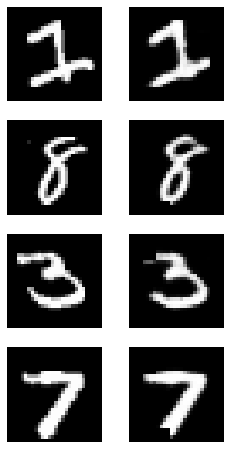

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0065315983079373835

In [18]:
# 테스트 데이터로 컨볼루션 오토인코더의 이미지 재 생성
import random
plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_x.shape[0])
    plt.imshow(test_x[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_x[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_x, test_x)

# 9.3 클러스터링
잠재변수는 데이터의 가장 압축된 표현이다. 정보의 일부를 잃어버리는 손실 압축을 거치지만 이전 절에서 본 것처럼 잃어버리는 정보는 이미지에 실수로 찍힌 작은 점처럼 중요하지 않거나 세부적인 것일 확률이 높다. 잠재변수에는 데이터를 효과적으로 복원할 수 있도록 중요한 정보만 포함된다.

이러한 잠재변수를 이용해 데이터를 여러 개 군집으로 클러스터링할 수 있다. 클러스터링은 원래 비지도학습의 한 종류이다. 

비지도학습은 입력에 대한 정답 출력이 존재하지 않는다. 앱에 접속하는 고객은 몇 개의 집단으로 분류할 수 있을까? 사람의 얼굴 이미지를 몇 개의 집단으로 분류하는 것이 적절할까? 등 쉽게 답을 내리기 어려운 문제들이지만 클러스터링 알고리즘을 이용해 군집으로 나누는 시도를 해볼 수 있다.

## 9.3.1 K-Means Clustering
K-Means Clustering은 주어진 입력 중 k개의 클러스터 중심을 임의로 정한 다음에 각 데이터와 k개의 중심과의 거리를 비교하여 가장 가까운 클러스터로 배당하고 k개의 중심의 위치를 해당 클러스터로 옮긴 후 이를 반복하는 간단한 알고리즘이다.


In [19]:
# 잠재변수 추출 모델 정의 및 실행
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_x)
print(latent_vector.shape)
print(latent_vector[0])

(60000, 64)
[ 9.120594   -1.         31.43709    18.09547     8.020109   16.141678
  9.324375   -1.         -1.         -1.         20.828905   20.9129
 14.121379   -1.         33.687668   -1.         20.312939    1.5984207
 -1.          1.024643   -1.         14.773507   10.302794   26.920233
 -1.         -1.         15.950666   -1.         26.89184    -1.
 -0.74321795 26.87693    -0.99999994 -1.         10.172321   11.472617
 -1.          9.723616   -1.         -0.9999999  -0.99987936  7.21426
 -1.         -1.         -1.         10.153095   26.520525    7.408297
 16.786785   -1.          8.384543   14.453899    6.75111    -1.
  3.3893182  -1.         25.700695   12.185758    4.063753   -0.99999994
 11.77358    23.84496    20.304071    6.1874266 ]


한 줄로 모델을 만들고 훈련 데이터를 64차원의 잠재변수로 만들었다. 이제 이 잠재변수에 k-평균 클러스터링 알고리즘을 사용해 클러스터링을 시도해보자. 이때 편리하게 k-평균 클러스터링 알고리즘을 불러올 수 있는 scikit-learn 라이브러리를 사용할 수 있다. 사이킷런은 데이터 마이닝과 분석을 위한 머신러닝 라이브러리로서 엄청나게 많은 기능을 제공한다.

In [20]:
# scikit-learn 의 K-Means Clustering 알고리즘 사용
from sklearn.cluster import KMeans

# n_clusters : k에 해당하는 클러스터 중심의 개수
# n_init : 알고리즘의 실행 횟수 (여기서는 10을 입력했기 때문에 중심의 위치를 다르게 선택해서 10번 테스트 한 뒤 가장 좋은 결과를 저장)
# random_state  : 알고리즘의 계산 결과를 동일하게 가져가기 위해서는 랜덤 초기화 숫자이다.
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [21]:
# 계산 결과 확인

# labels_ : 각 데이터가 0부터 9사이의 어떤 클러스터에 속하는지에 대한 정보가 저장
# cluster_centers_ : 각 클러스터의 중심 좌표가 저장되지만 잠재변수와 마찬가지로 64차원이기 때문에 이 좌표가 무엇을 의미하는지 직관적으로 알기도 힘들고 시각화도 어렴다.
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_[0])

[5 3 8 ... 6 2 6]
[[20.294704   -1.         20.093962   19.184574   16.867764   18.901814
  19.125105   -1.         -1.         -1.         22.794203   24.831963
  22.353863   -1.         31.55579    -1.         22.292524    4.629022
  -1.          3.8464606  -1.         29.447186   16.425154   21.965425
  -1.         -1.         21.30714    -1.         23.134506   -1.
  15.668085   22.685307   -1.         -1.         21.735298   17.674732
  -1.         19.707127   -1.         -1.         -0.99947256  7.33603
  -1.         -1.         -1.         21.333977   23.17173    19.32247
  21.652203   -1.         26.660675   22.219864    7.0927076  -1.
   6.063502   -1.         19.713263   19.496086    7.3813877  -1.
  19.551506   17.869339   32.20759    20.398682  ]
 [ 8.989881   -0.99970937  9.4848175  13.051018   19.482435   10.404834
  12.545183   -0.99918526 -0.9996309  -0.9997995  11.428883   11.317968
   7.4102488  -0.99930257 15.004765   -0.9998529   7.1155167   1.5045326
  -0.9998698  

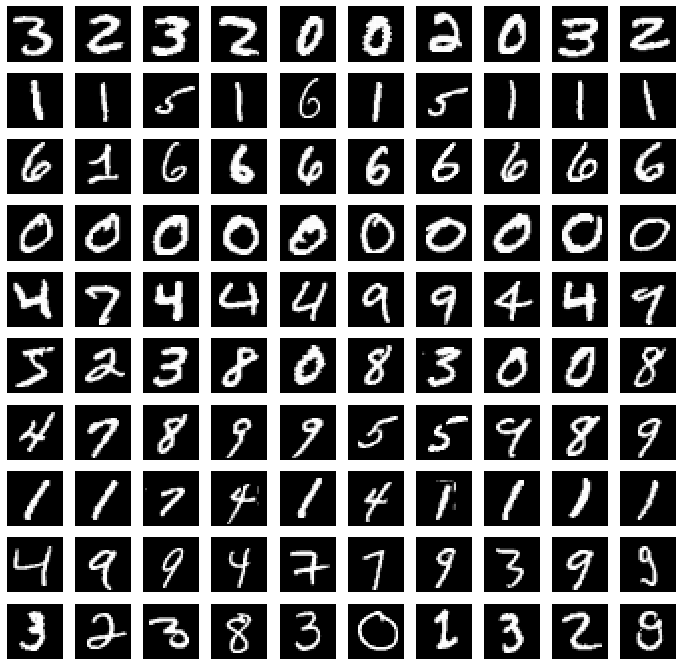

In [22]:
# 클러스터링 결과 출력
plt.figure(figsize=(12,12))

for i in range(10):
    images= train_x[kmeans.labels_ == i]
    for c  in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28,28,), cmap='gray')
        plt.axis('off')

plt.show()

정확하게 클러스터링 되지 않은 값들을 보안하기 위해 잠재변수의 차원 수를 늘리거나 KMeans 의 n_init을 늘려서 좀 더 분류가 잘 되도록 시도해볼 수 있다.
또는 n_clusters를 늘려서 클러스터를 더욱 세분화할 수 있다.

시각화 부분에서 2차원 혹은 3차원으로 잠재변수가 가진 차원을 축소해야 한다.
t_SNE는 바로 이 문제를 해결하는 훌륭한 알고리즘이다.

## 9.3.2 t-SNE
t-SNE는 강력한 시각화 도구로 고차원의 데이터를 저차원의 시각화를 위한 데이터로 변환한다.

k-평균 클러스터링이 클러스터를 계산하기 위한 단위로 중심과 각 데이터의 거리를 계산하는 데 비해 t-SNE는 각 데이터의 유사도를 정의하고 원래 공간에서의 유사도와 저 차원에서의 유사도가 비례해지도록 학습을 시킨다.

SNE = stochastic Neighbor Embedding
여기서 유사도는 확률로 표현되기 때문에 확률적이라느 단어가 포함된다.

거리를 확률로 표현한다는 것은 데이터 하나를 중심으로 다른 데이터를 거리에 대한 t-분포의 확률로 치환시키는 것이다. 가까운 거리의 데이터는 활률값이 높아지고 먼 거리의 데이터는 확률이 낮아진다.

고차원과 저차원에서 확률값을 각각 구한 다음, 저차원의 확률값이 고차원에 가까워지도록 학습시키는 것이 t-SNE 알고리즘의 주요 내용이다. t-SNE는 알고리즘 가운데 계산 속도가 느린편에 속하기 때문에 사이킷 런의 함수 설명에서는 고차원의 데이터라도 먼저 차원 축소를 진행해서 50차원 정도의 데이터를 넣을 것을 권장한다.

여기서는 잠재변수가 64차원이기 때문에 t-SNE 사용하는데 적합하다.

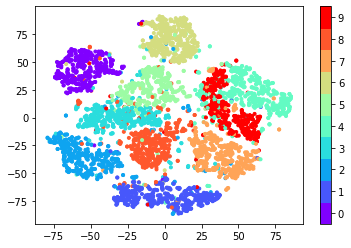

In [27]:
#  scikit-learn 의 t-SNE 사용

from sklearn.manifold import TSNE

# n_components : 저차원의 수
# learning rate : 학습률
# perplexity  : 알고리즘 계산에서 고려할 최근접 이웃의 숫자
# random_state : KMeans 와 마찬가지로 랜덤 초기화 숫자
tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0],tsne_vector[:,1], marker='.', c=train_y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters=10

tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

t-SNE가 k-평균 클러스터링 알고리즘과 차별화되는 점
- 클러스터의 숫자인 K를 지정할 필요가 없다는 것
- 대신에 최근접 이웃의 숫자인 perplexity를 조절하며 알맞은 값을 찾을 수 있다.

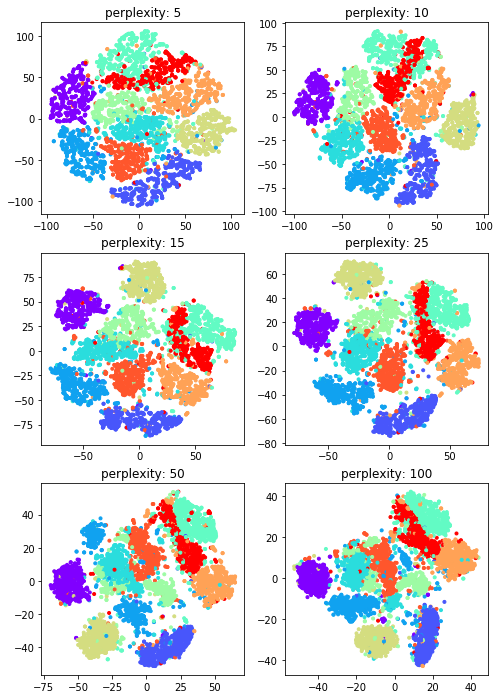

In [30]:
# 다양한 perplexity 인수에 대한 t-SNE 결과
perplexities = [5, 10 ,15, 25, 50, 100]
plt.figure(figsize=(8, 12))

for c in range(6):
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:5000])

    plt.subplot(3, 2, c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_y[:5000], cmap='rainbow')
    plt.title('perplexity: {0}'.format(perplexities[c]))


plt.show()

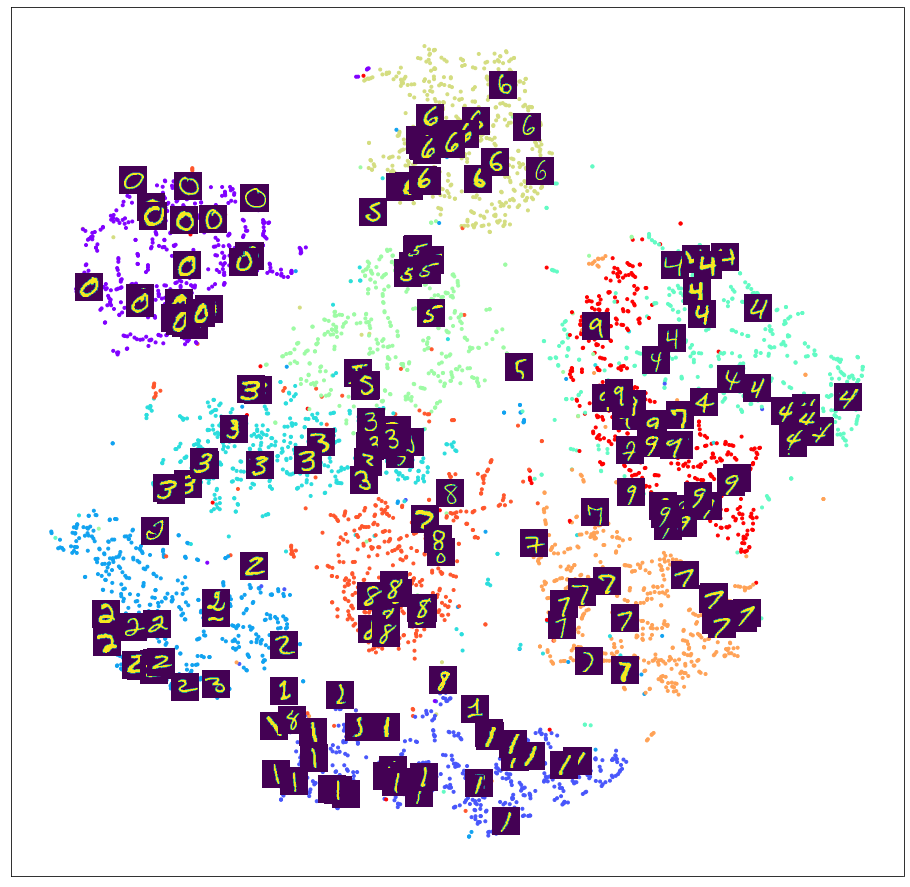

In [34]:
# t-SNE 클러스터 위에 MNIST 이미지 표시
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16,16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_y[:5000], cmap='rainbow')
for i in range(200):  # 전체적인 분포와 이미지만 확인하기 위해서 이미지는 200개만 표시
    imagebox = OffsetImage(train_x[i].reshape(28,28))
    ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
    ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()


- AnnotationBbox : 이미지나 텍스트 등의 주석을 그래프 위에 표시하기 위해 주석 
상자를 그리는 함수


이처럼 t-SNE 시각화 위에 데이터를 표시하면 오토인코더로 추출된 잠재변수가 데이터를 효율적으로 압축하고 있음을 알 수 있다. 데이터가 효과적으로 압축되지 않았다면 위와 같은 결과를 얻을 수 없다.